# Mass spring animations

I wanted to make some animations of a single mass on two springs for my talk. Matplot lib was not a bad option in the end, combined with Imagemagick to convert my PNG files into an animated gif that I could import into Keynote. 

Inspiration from here:

https://scipython.com/blog/the-spring-pendulum/

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
def plot_spring(x1,y1,x2,y2):
    L = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    theta = np.arctan2(-(y2-y1),(x2-x1))

    width, nturns = 1, 10
    N = 1000
    pad = 200

    # Make the spring, unit scale (0 to 1)
    x_spring = np.linspace(0, L, N) # distance along the spring
    y_spring= np.zeros(N)
    y_spring[pad:-pad] = width * np.sin(2*np.pi * nturns * x_spring[pad:-pad]/L)

    # Rotate the spring
    R = np.array([[np.cos(theta), np.sin(theta)],
                  [-np.sin(theta), np.cos(theta)]])

    x_plot, y_plot = R @ np.vstack((x_spring, y_spring))

    # And offset it
    x_plot += x1
    y_plot += y1
    ax.plot(x_plot, y_plot, c='k')

def plot_mass(x,y):
    mass = Circle((x, y), 0.4, fc='k')
    ax.add_patch(mass)

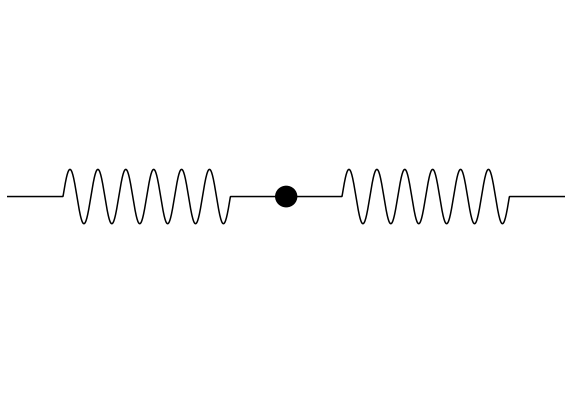

In [61]:
ymax = 6
def make_plot(u):   
    plt.axis('off')
    plot_spring(0,0,10,u)
    plot_spring(10,u,20,0)
    plot_mass(10,u)
    plt.xlim(0,20)
    plt.ylim(-ymax-1,ymax+1)

fig, ax = plt.subplots(figsize=(10,7))
make_plot(0)
plt.show()

In [41]:
npts = 30
for n in range(0,npts):
    fig, ax = plt.subplots(figsize=(10,7))
    u = 6*np.sin(n/npts*2*np.pi)
    make_plot(u)
    plt.savefig("vertical_%02d.png" % n, bbox_inches = 'tight')
    plt.close()

In [56]:
!convert "vertical*" movie_vertical.gif
!rm vertical*

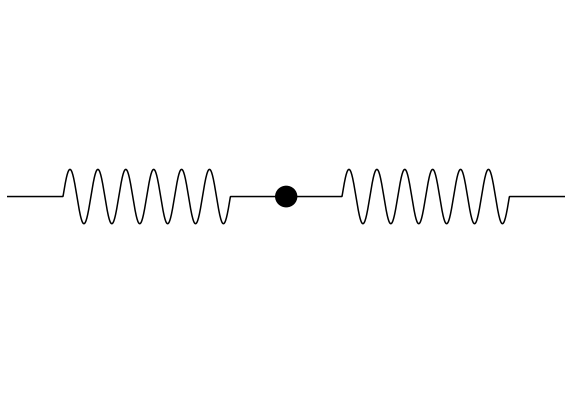

In [38]:
fig, ax = plt.subplots(figsize=(10,7))
make_plot(0)
plt.savefig("base_fig.pdf", bbox_inches = 'tight')

Idea for future: make springs colored dependent on how stretched they are? Or their velocity? 

In [63]:
ymax = 1
L = 20
def make_plot_horizontal_stretch(u):
    plt.axis('off')
    plot_spring(0,0,L-u,0)
    plot_spring(L-u,0,2*L,0)
    plot_mass(L-u,0)
    plt.xlim(0,2*L)
    plt.ylim(-ymax-1,ymax+1)

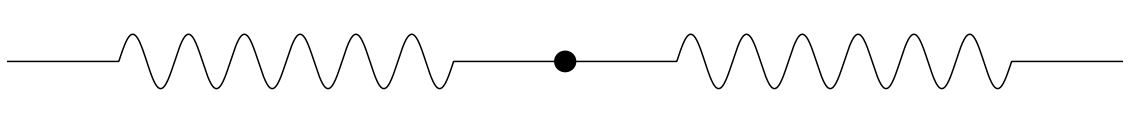

In [64]:
fig, ax = plt.subplots(figsize=(20,2))
make_plot_horizontal_stretch(0)

In [70]:
npts = 30
for n in range(0,npts):
    fig, ax = plt.subplots(figsize=(20,2))
    u = 3*np.sin(n/npts*2*np.pi)
    make_plot_horizontal_stretch(u)
    plt.savefig("stretch_horizontal_%02d.png" % n, bbox_inches = 'tight')
    plt.close()

In [71]:
!convert "stretch_horizontal*" movie_stretch_horizontal.gif
!rm stretch_horizontal*

In [3]:
!ls *.gif

movie_horizontal.gif         movie_vertical.gif
movie_stretch_horizontal.gif


<img src="movie_vertical.gif">
<img src="movie_horizontal.gif">
